# PROJECT TITLE: Churn Prediction in Telecom using Machine Learning

### Aim: To predict the customers who are likely to churn in the next N months & facilitate in taking business actions for reducing the churn.

### Business Objective
In any service providing industry, when a customer decides to stop using the service either by cancelling the subscription or not paying for the service, we call this customer churn.

Churn is defined as how many customers are not using the service for a certain period.

Hence, customer churn is one of the essential metrics that every business must evaluate to grow. The churn rate is calculated by dividing the number of lost customers by the last number of customers. Thus, a company churn rate must be as low as possible, ideally 0%.

But why is it so important to calculate the churn rate? Does it affect the business if you lose around 5% of customers? Yes, the answer is that it costs more to acquire a new customer than retain the existing customers. Retaining the current customers, any company can spend less on operating costs needed to reach new customers.

So, we will use advanced machine learning techniques to predict the potential churners who are about to leave a company’s service and take the necessary steps to prevent it.

This project aims to build a deep learning model that will help predict customers who are likely to churn in the next N months and facilitate in taking business actions for reducing the churn.

### Data Description 
The available dataset is:
Telco-Customer-Churn – 

This dataset has 7043 rows and 21 columns present.

The 21 features of this dataset are as follows:
1. Churn – the target variable, if the customer is churned or not (Yes / No)
2. customerID – The unique identification of every customer
3. gender- If the customer is a male or a female (Female / Male)
4. SeniorCitizen – If the customer is a senior citizen or not (0 / 1)
5. Partner – If the customer has a partner or not (Yes/No)
6. Dependents – If the customer has any dependents (Yes / No)
7. Tenure – The time period(months) the customer has stayed with the company.
8. PhoneService – If the customer has a phone service or not (Yes/No)
9. MultipleLines – If the customer has multiple lines or not (Yes/No/No Phone service)
10. InternetService – If the customer has any internet service or not (DSL/ Fibre optics/ No)
11. OnlineSecurity – If the customer has any online security (Yes/No/No internet service)
12. OnlineBackup – If the customer has any online backup (Yes/No/No internet service)
13. DeviceProtection – If the customer has device protection (Yes/No/No internet service)
14. TechSupport – If the customer has tech support (Yes/ No/ No internet service)
15. StreamingTV – If the customer has any streaming TV (Yes/ No/ No internet service)
16. StreamingMovies – If the customer has streaming movies (Yes/ No/ No internet service)
17. Contract – The customer term period with the company (Month-to-month, One year, Two 
years)
18. PaperlessBilling – If the customer has paperless billing or not (Yes/ No)
19. PaymentMethod – The payment mode of each customer (Electronic check, mailed 
check,Bank transfer, Credit card)
20. MonthlyCharges – The amount that is charged to the customer every month
21. TotalCharges – The total amount charged to the customer

#### Notebook Contents :
1. Dataset Information

2. Exploratory Data Analysis (EDA)
       2.1. Automated EDA(Pandas Profiling)
       2.2. Manually performing EDA with Observations
3. Feature Engineering

4. Modeling

5. Conclusion

### 1. Dataset Information

In [1]:
#importing the common libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the dataset
df = pd.read_csv(r'D:\dsap class\project\TELECOM CHURN\data\WA_Fn_UseC_Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2. Exploratory Data Analysis

####           2.1 Automated EDA (Pandas Profiling)

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, title='Pandas Profiling Report')
df.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 2.2 Performing EDA 

In [6]:
#checking how many rows and columns are present
df.shape

(7043, 21)

In [7]:
#getting to know the column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
for col in df.columns:
    print(col, ":", len(df[col].unique()),'labels')

customerID : 7043 labels
gender : 2 labels
SeniorCitizen : 2 labels
Partner : 2 labels
Dependents : 2 labels
tenure : 73 labels
PhoneService : 2 labels
MultipleLines : 3 labels
InternetService : 3 labels
OnlineSecurity : 3 labels
OnlineBackup : 3 labels
DeviceProtection : 3 labels
TechSupport : 3 labels
StreamingTV : 3 labels
StreamingMovies : 3 labels
Contract : 3 labels
PaperlessBilling : 2 labels
PaymentMethod : 4 labels
MonthlyCharges : 1585 labels
TotalCharges : 6531 labels
Churn : 2 labels


In [9]:
#creating a function to create a table that has feature_name, dtype, missing values and the number of unique values
def insights_table(df):
    summary = pd.DataFrame(df.dtypes,columns=['dtypes'])
    summary = summary.reset_index()
    summary['Feature_name'] = summary['index']
    summary = summary[['Feature_name','dtypes']]
    summary['Missing_values'] = df.isnull().sum().values    
    summary['No. Uniques_values'] = df.nunique().values
    return summary
insights_table(df)

,Feature_name,dtypes,Missing_values,No. Uniques_values
0,customerID,object,0,7043
1,gender,object,0,2
2,SeniorCitizen,int64,0,2
3,Partner,object,0,2
4,Dependents,object,0,2
5,tenure,int64,0,73
6,PhoneService,object,0,2
7,MultipleLines,object,0,3
8,InternetService,object,0,3
9,OnlineSecurity,object,0,3


#### Observation: Missing Data - Initial Intuition
Here, we don't have any missing data.

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Observation from the descriptive statiistics
* Senior citizen column is the form of 0's and 1's, here the distribution is not proper
* Tenure :
-->Average tenure is around less than 32 months
-->25% customers have a tenure of less than 9 months
-->50% customers have a tenure of less than 29 months
-->75% customers have a tenure of less than 55months
-->maximum customers have a tenure of less than 72months
* Monthly Charges : 
-->Average monthly charges is USD 64.76 


The dataset has too many features with text data and are probably categorical features.


Removing customer ID, as it is unique to every record.

In [11]:
#df.drop(columns = ['customerID'], inplace = True)

Understanding the Target variable

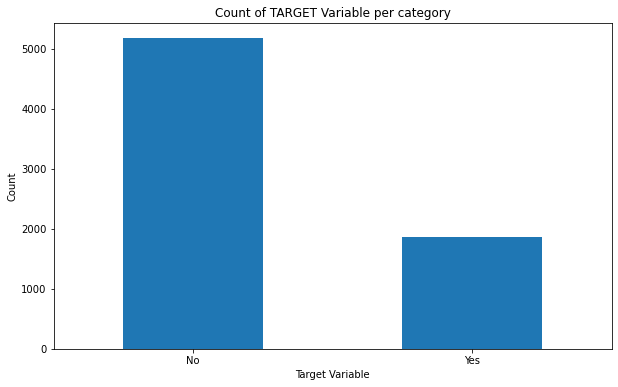

In [12]:
df['Churn'].value_counts().plot.bar(figsize=(10, 6), rot = 0)
plt.ylabel("Count")
plt.xlabel("Target Variable")
plt.title("Count of TARGET Variable per category");

In [13]:
(df['Churn'].value_counts()/len(df['Churn']))*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

#### Observation:
We see that our target variables are imbalanced(73%:27% ratio)

#### Univariate Analysis wrt Churn

In [14]:
df1 = df.drop(columns = ['customerID','Churn','TotalCharges', 'MonthlyCharges','tenure'])
df1.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

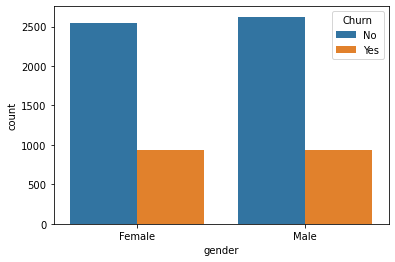

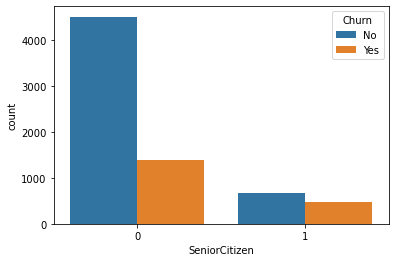

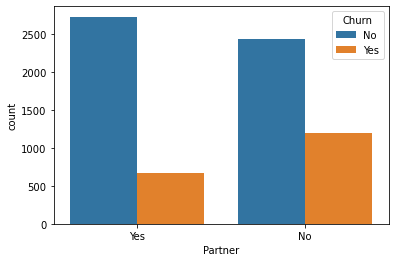

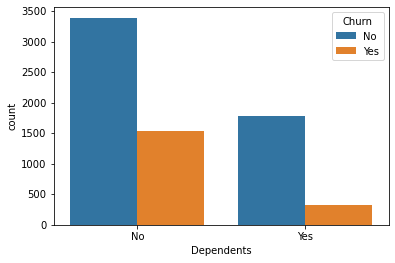

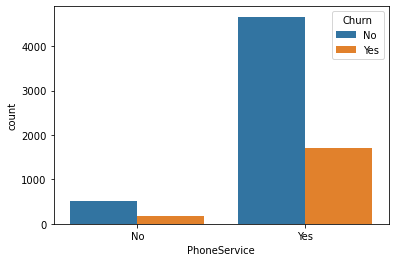

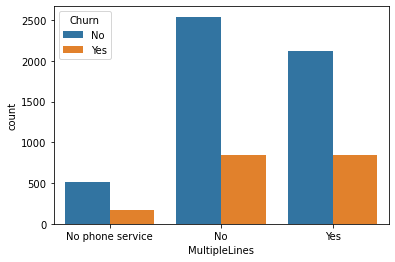

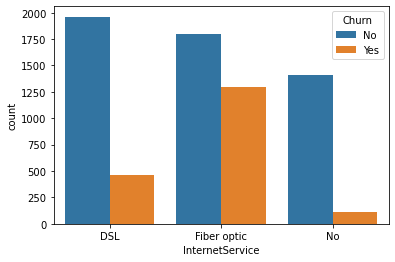

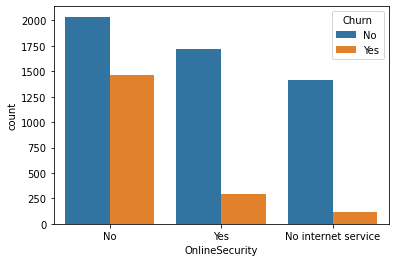

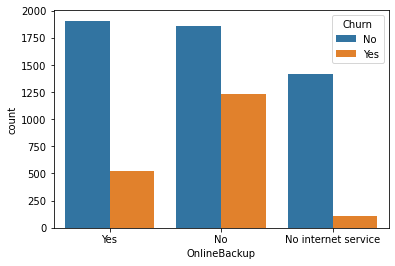

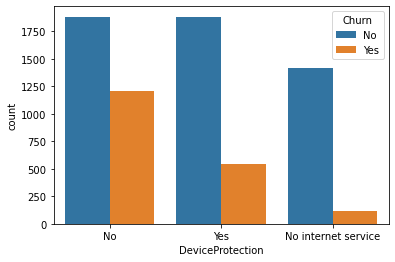

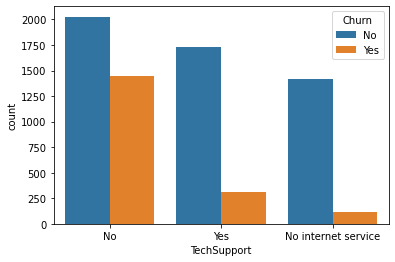

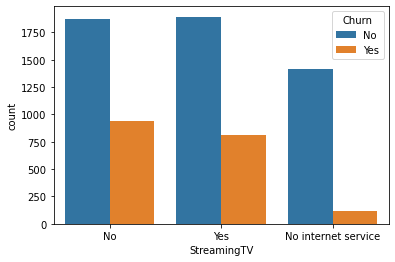

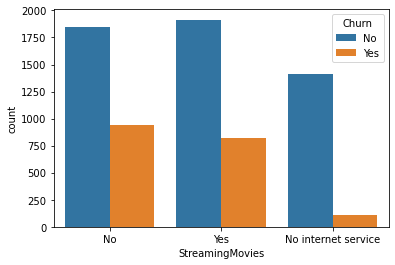

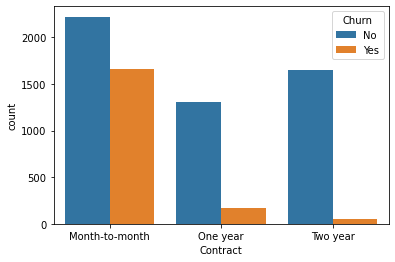

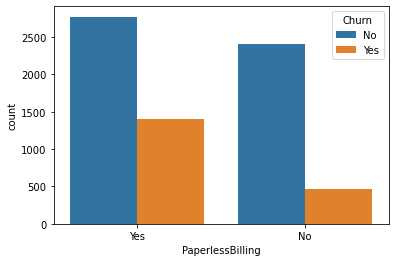

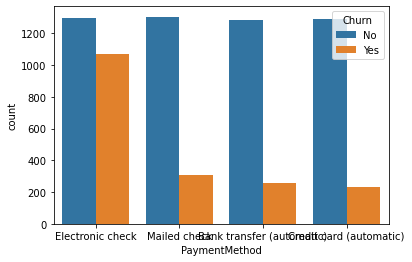

In [15]:
for i in df1:
    plt.figure(i)
    sns.countplot(data=df, x = i, hue='Churn')

In [16]:
new_df = df.copy(deep = True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

new_df = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe())]
text_data_features.remove('TotalCharges')
text_data_features.remove('customerID')
# removing TotalCharges here because it is a float varible but given as object, so we shouldnt do label encoding for it

print('Label Encoder Transformation\n')
for i in text_data_features :
    new_df[i] = le.fit_transform(new_df[i])
    print(i,' : ',new_df[i].unique(),' = ',le.inverse_transform(new_df[i].unique()))

Label Encoder Transformation

gender  :  [0 1]  =  ['Female' 'Male']
Partner  :  [1 0]  =  ['Yes' 'No']
Dependents  :  [0 1]  =  ['No' 'Yes']
PhoneService  :  [0 1]  =  ['No' 'Yes']
MultipleLines  :  [1 0 2]  =  ['No phone service' 'No' 'Yes']
InternetService  :  [0 1 2]  =  ['DSL' 'Fiber optic' 'No']
OnlineSecurity  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
OnlineBackup  :  [2 0 1]  =  ['Yes' 'No' 'No internet service']
DeviceProtection  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
TechSupport  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingTV  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
StreamingMovies  :  [0 2 1]  =  ['No' 'Yes' 'No internet service']
Contract  :  [0 1 2]  =  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling  :  [1 0]  =  ['Yes' 'No']
PaymentMethod  :  [2 3 0 1]  =  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn  :  [0 1]  =  ['No' 'Yes']


In [18]:
#viewing the new dataframe after label encoding
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


#### Group 1 : Customer Information wrt Churn
gender, SeniorCitizen, Partner, Dependents

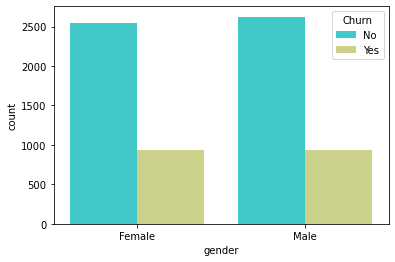

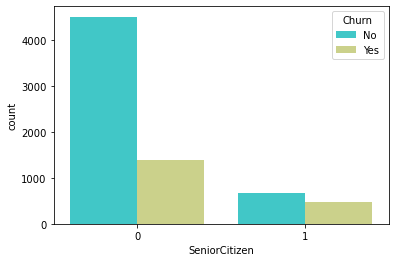

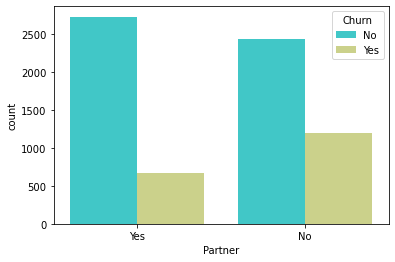

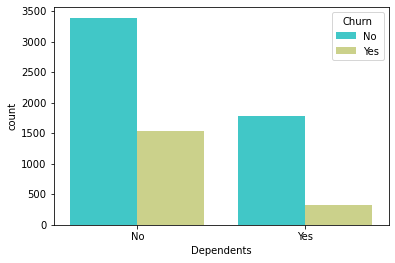

In [19]:
l1 = df[['gender','SeniorCitizen','Partner','Dependents']]
for i in l1:
    plt.figure(i)
    sns.countplot(data=df, x = i, hue='Churn',palette = 'rainbow')

##### Observations:
1. Customer churning for male & female customers is very similar to each other.
2. Similarly, Customer churning for SeniorCitizen customers is pretty low.
3. Customers who living with a Partner churned less as compared to those not living with a Partner.
4. Churning is high for the customers that don't have Dependents with them.

#### Group 1 : Customer Information wrt only customers likely to churn(churn == yes/1)
gender, SeniorCitizen, Partner, Dependents

In [20]:
# Customer Information
gender = new_df[new_df['Churn'] == 1]['gender'].value_counts()
gender = [gender[0] / sum(gender) * 100, gender[1] / sum(gender) * 100] # Female / Male

seniorcitizen = new_df[new_df['Churn'] == 1]['SeniorCitizen'].value_counts()
seniorcitizen = [seniorcitizen[0] / sum(seniorcitizen) * 100,seniorcitizen[1] / sum(seniorcitizen) * 100] # No - Yes

partner = new_df[new_df['Churn'] == 1]['Partner'].value_counts()
partner = [partner[0] / sum(partner) * 100,partner[1] / sum(partner) * 100] # No - Yes

dependents = new_df[new_df['Churn'] == 1]['Dependents'].value_counts()
dependents = [dependents[0] / sum(dependents) * 100,dependents[1] / sum(dependents) * 100] # No - Yes

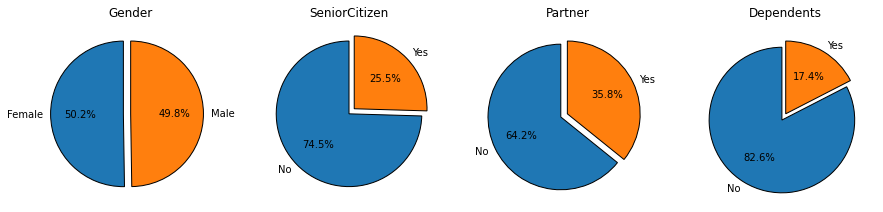

In [21]:
ax,fig = plt.subplots(nrows = 1,ncols = 4,figsize = (15,15))

plt.subplot(1,4,1)
plt.pie(gender,labels = ['Female','Male'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Gender');

plt.subplot(1,4,2)
plt.pie(seniorcitizen,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('SeniorCitizen');

plt.subplot(1,4,3)
plt.pie(partner,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Partner');

plt.subplot(1,4,4)
plt.pie(dependents,labels = ['No','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Dependents');

##### Observations:
1. We can observe a clear cut 50% - 50% split between the male and female customers that have switched their services.
2. 75% of the churned customers are not SeniorCitizen! This is a major info that the company needs to divert it's attention towards
3. Customers living without a partner have cutoff the services.
4. Customers living without a dependent have cutoff the services.
5. From Partners & Dependents data, average of ((64.2+82.6)/2)=73.4% of customers who were living by themselves have churned out.

#### Group 2: Services Subscribed by the Customer wrt Churn
PhoneService, MultipleLines, InternetService, StreamingTV, StreamingMovies, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

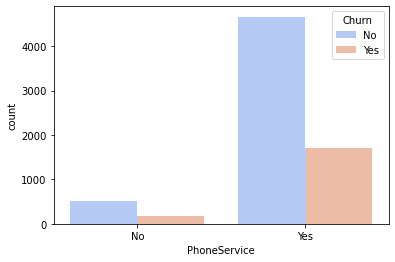

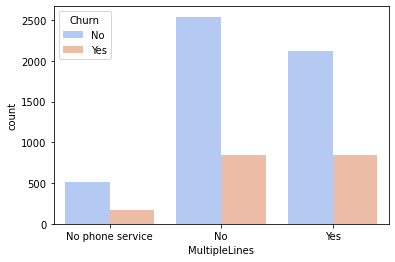

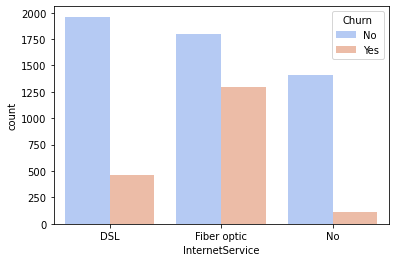

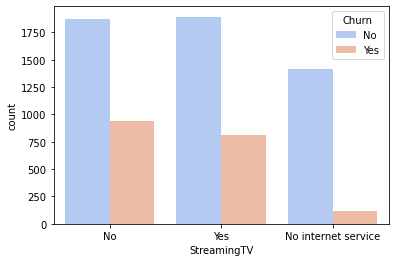

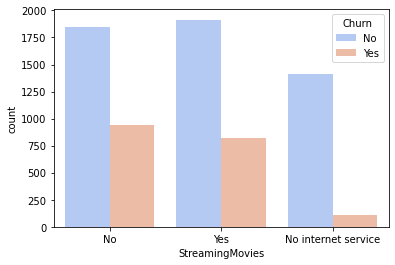

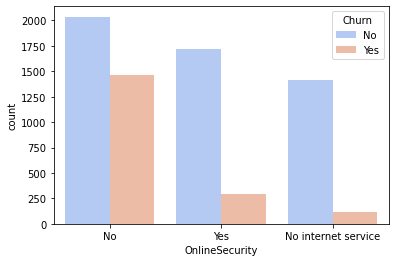

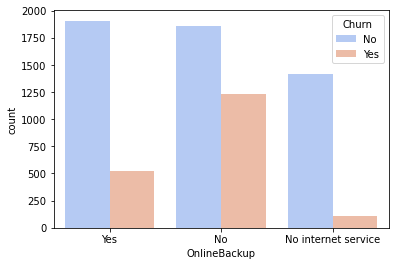

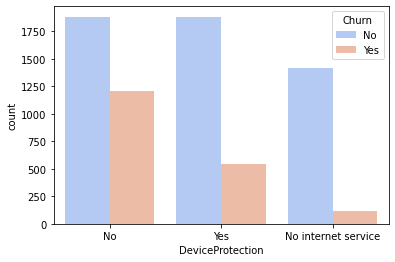

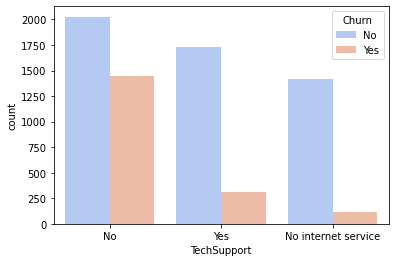

In [22]:
# Services Signed Up for!
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] 
for i in l2:
    plt.figure(i)
    sns.countplot(data=df, x = i, hue='Churn',palette = 'coolwarm')

##### Observations:
1. For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
3. A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!
4. StreamingTV and StreamingMovies display an identical graph. Irrespective of being subscribed to StreamingTV & StreamingMovies, a lot of customers have been churned.
5. When there is no OnlineSecurity, many customers have churned.
6. When there is no OnlineBackup, many customers have churned.
7. When there is no DeviceProtection, many customers have churned and
8. when there is less TechSupport, many customers have churned

#### Group 2: Services Subscribed by the Customer  wrt only customers likely to churn(churn == yes/1)

In [23]:
phoneservice = new_df[new_df['Churn'] == 1]['PhoneService'].value_counts()
phoneservice = [phoneservice[0] / sum(phoneservice) * 100, phoneservice[1] / sum(phoneservice) * 100] # No - Yes

multiplelines = new_df[new_df['Churn'] == 1]['MultipleLines'].value_counts()
multiplelines = [multiplelines[0] / sum(multiplelines) * 100,multiplelines[1] / sum(multiplelines) * 100, multiplelines[2] / sum(multiplelines) * 100] # No - No Phone Service - Yes 

internetservice = new_df[new_df['Churn'] == 1]['InternetService'].value_counts()
internetservice = [internetservice[0] / sum(internetservice) * 100,internetservice[1] / sum(internetservice) * 100, internetservice[2] / sum(internetservice) * 100] # DSL - Fiber Optic - No 

streamingtv = new_df[new_df['Churn'] == 1]['StreamingTV'].value_counts()
streamingtv = [streamingtv[0] / sum(streamingtv) * 100,streamingtv[1] / sum(streamingtv) * 100, streamingtv[2] / sum(streamingtv) * 100] # No - No Internet Service - Yes 

streamingmovies = new_df[new_df['Churn'] == 1]['StreamingMovies'].value_counts()
streamingmovies = [streamingmovies[0] / sum(streamingmovies) * 100,streamingmovies[1] / sum(streamingmovies) * 100, streamingmovies[2] / sum(streamingmovies) * 100] # No - No Internet Service - Yes

onlinesecurity = new_df[new_df['Churn'] == 1]['OnlineSecurity'].value_counts()
onlinesecurity = [onlinesecurity[0] / sum(onlinesecurity) * 100,onlinesecurity[1] / sum(onlinesecurity) * 100, onlinesecurity[2] / sum(onlinesecurity) * 100] # No - No Internet Service - Yes 

onlinebackup =new_df[new_df['Churn'] == 1]['OnlineBackup'].value_counts()
onlinebackup = [onlinebackup[0] / sum(onlinebackup) * 100,onlinebackup[1] / sum(onlinebackup) * 100, onlinebackup[2] / sum(onlinebackup) * 100] # No - No Internet Service - Yes 

deviceprotection = new_df[new_df['Churn'] == 1]['DeviceProtection'].value_counts()
deviceprotection = [deviceprotection[0] / sum(deviceprotection) * 100,deviceprotection[1] / sum(deviceprotection) * 100, deviceprotection[2] / sum(deviceprotection) * 100] # No - No Internet Service - Yes 

techsupport = new_df[new_df['Churn'] == 1]['TechSupport'].value_counts()
techsupport = [techsupport[0] / sum(techsupport) * 100,techsupport[1] / sum(techsupport) * 100, techsupport[2] / sum(techsupport) * 100] # No - No Internet Service - Yes 

Text(0.5, 1.0, 'TechSupport')

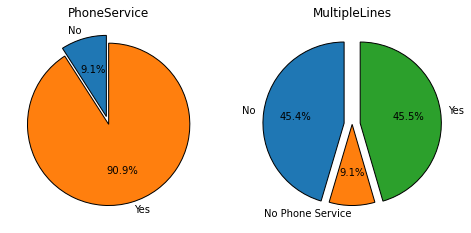

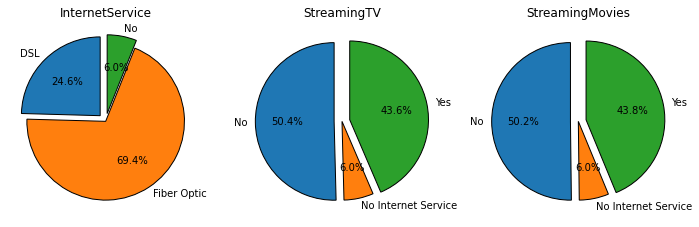

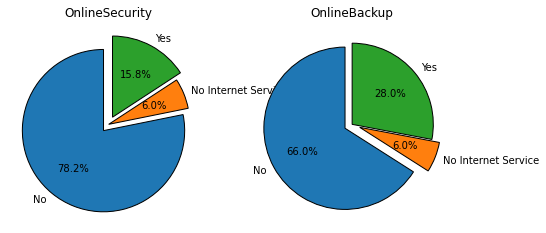

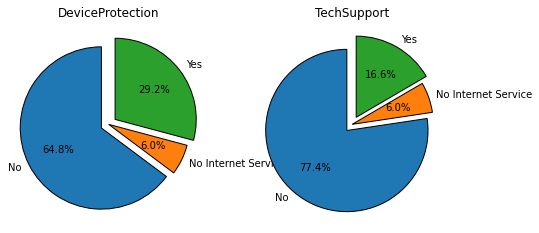

In [24]:
ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(phoneservice,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PhoneService')

plt.subplot(1,2,2)
plt.pie(multiplelines,labels = ['No','No Phone Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('MultipleLines')

ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(internetservice,labels = ['DSL', 'Fiber Optic','No'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('InternetService')

plt.subplot(1,3,2)
plt.pie(streamingtv,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingTV')

plt.subplot(1,3,3)
plt.pie(streamingmovies,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('StreamingMovies')

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))

plt.subplot(1,2,1)
plt.pie(onlinesecurity,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineSecurity')

plt.subplot(1,2,2)
plt.pie(onlinebackup,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('OnlineBackup')

ax,fig = plt.subplots(nrows = 1,ncols = 2,figsize = (8,8))
plt.subplot(1,2,1)
plt.pie(deviceprotection,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('DeviceProtection')

plt.subplot(1,2,2)
plt.pie(techsupport,labels = ['No', 'No Internet Service','Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('TechSupport')

##### Observations:
1. Despite providing PhoneService, a high percentage of customers have switched!
2. Similarly, availability of MultipleLines did not matter, as customer unsubscription was carried out regardless!
3. For StreamingTV & StreamingMovies, customers without these services definitely cancelled their subscription, however an average of 43.7% of customers switched despite consuming the streaming content.
4. Above pie charts stress out the significance of providing OnlineSecurity, OnlineBackup, DeviceProtection & TechSupport as an average of 71.6% customers cutoff their services due to lack of these features!

#### Group 3 : Payment Information wrt Churn
Contract, PaperlessBilling, PaymentMethod 

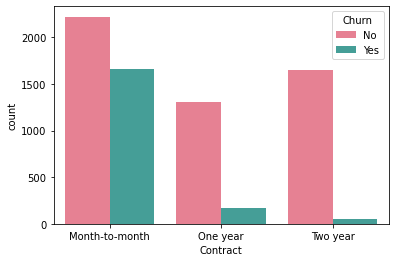

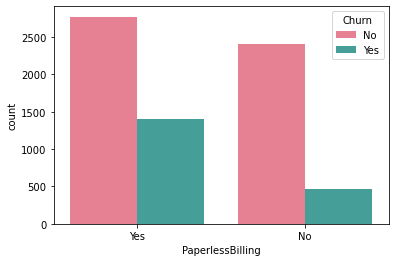

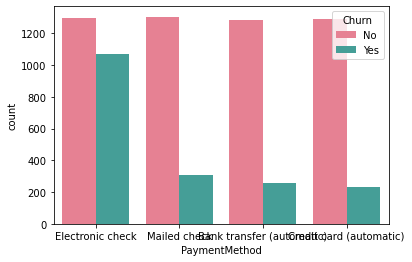

In [25]:
# Payment Information
l3 = ['Contract','PaperlessBilling','PaymentMethod']
for i in l3:
    plt.figure(i)  
    sns.countplot(data=df, x = i, hue='Churn',palette = 'husl')

##### Observation:
1. Customer churning for a Month-to-Month based Contract is quite high. This is probably because the customers are testing out the varied services available to them,hence month service is tested out!
2. PaperlessBilling displays a high number of customers being churned out. This is probably because of some payment issue.
3. Customers clearly resented the Electronic check PaymentMethod. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.

#### Group 3 : Payment Information  wrt only customers likely to churn(churn == yes/1)
Contract, PaperlessBilling, PaymentMethod 

In [26]:
contract = new_df[new_df['Churn'] == 1]['Contract'].value_counts()
contract = [contract[0] / sum(contract) * 100, contract[1] / sum(contract) * 100, contract[2] / sum(contract) * 100] # Month-to-month - One year - Two year

paperlessbilling = new_df[new_df['Churn'] == 1]['PaperlessBilling'].value_counts()
paperlessbilling = [paperlessbilling[0] / sum(paperlessbilling) * 100,paperlessbilling[1] / sum(paperlessbilling) * 100] # No - Yes 

paymentmethod = new_df[new_df['Churn'] == 1]['PaymentMethod'].value_counts()
paymentmethod = [paymentmethod[0] / sum(paymentmethod) * 100, paymentmethod[1] / sum(paymentmethod) * 100, 
            paymentmethod[2] / sum(paymentmethod) * 100, paymentmethod[3] / sum(paymentmethod) * 100] 
            # Bank Transfer (automatic) - Credit Card (automatic) - Electronic check - Mailed check

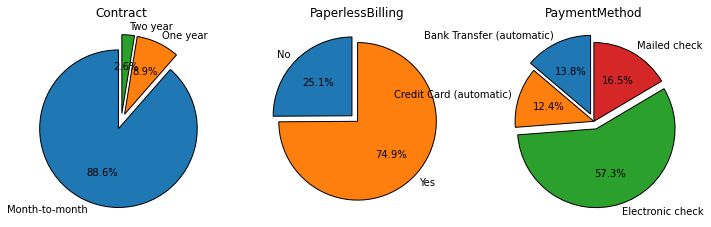

In [27]:
ax,fig = plt.subplots(nrows = 1,ncols = 3,figsize = (12,12))

plt.subplot(1,3,1)
plt.pie(contract,labels = ['Month-to-month','One year','Two year'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0.1,0.1),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('Contract');

plt.subplot(1,3,2)
plt.pie(paperlessbilling,labels = ['No', 'Yes'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaperlessBilling');

plt.subplot(1,3,3)
plt.pie(paymentmethod,labels = ['Bank Transfer (automatic)','Credit Card (automatic)','Electronic check','Mailed check'],autopct='%1.1f%%',startangle = 90,explode = (0.1,0,0.1,0),
       wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True})
plt.title('PaymentMethod');

##### Observation:
1. Month-to-Month Contract duration has the dominating share when it comes churning with a massive 88.6% customers!
2. PaperlessBilling does not seemed to be appreciated by the customers!
3. Electronic check definitely needs to be sorted as it accounts for 57.3% of churn. It is then followed by Mailed check, Bank Transfer (automatic) & Credit Card (automatic)!

### 3. Feature Engineering (Data Preprocessing)

Total Charges should be numeric. So converting it to numerical data type

In [28]:
new_df.TotalCharges = pd.to_numeric(new_df.TotalCharges, errors='coerce')
new_df.TotalCharges.isnull().sum()

11

Using errors='coerce'. It will replace all non-numeric values with NaN.

We see there are 11 missing values in TotalCharges column.

In [29]:
new_df[new_df.TotalCharges.isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,0,0,1,1,0,0,1,0,2,...,2,2,2,0,2,1,0,52.55,NaN,0
753,3115-CZMZD,1,0,0,1,0,1,0,2,1,...,1,1,1,1,2,0,3,20.25,NaN,0
936,5709-LVOEQ,0,0,1,1,0,1,0,0,2,...,2,0,2,2,2,0,3,80.85,NaN,0
1082,4367-NUYAO,1,0,1,1,0,1,2,2,1,...,1,1,1,1,2,0,3,25.75,NaN,0
1340,1371-DWPAZ,0,0,1,1,0,0,1,0,2,...,2,2,2,0,2,0,1,56.05,NaN,0
3331,7644-OMVMY,1,0,1,1,0,1,0,2,1,...,1,1,1,1,2,0,3,19.85,NaN,0
3826,3213-VVOLG,1,0,1,1,0,1,2,2,1,...,1,1,1,1,2,0,3,25.35,NaN,0
4380,2520-SGTTA,0,0,1,1,0,1,0,2,1,...,1,1,1,1,2,0,3,20.00,NaN,0
5218,2923-ARZLG,1,0,1,1,0,1,0,2,1,...,1,1,1,1,1,1,3,19.70,NaN,0
6670,4075-WKNIU,0,0,1,1,0,1,2,0,0,...,2,2,2,0,2,0,3,73.35,NaN,0


### Observation: 
All the new customers(i.e. tenure=0 months) have no total charges data available.
Since the number of these records compared to total dataset is very low, so it is safe to ignore them from further processing.


We can drop these rows here as all of them have been in the system for less than a month and Customers are marked as churned if they have left the system in the last one month.

In [30]:
#Removing missing values
new_df.dropna(inplace = True)

<AxesSubplot:>

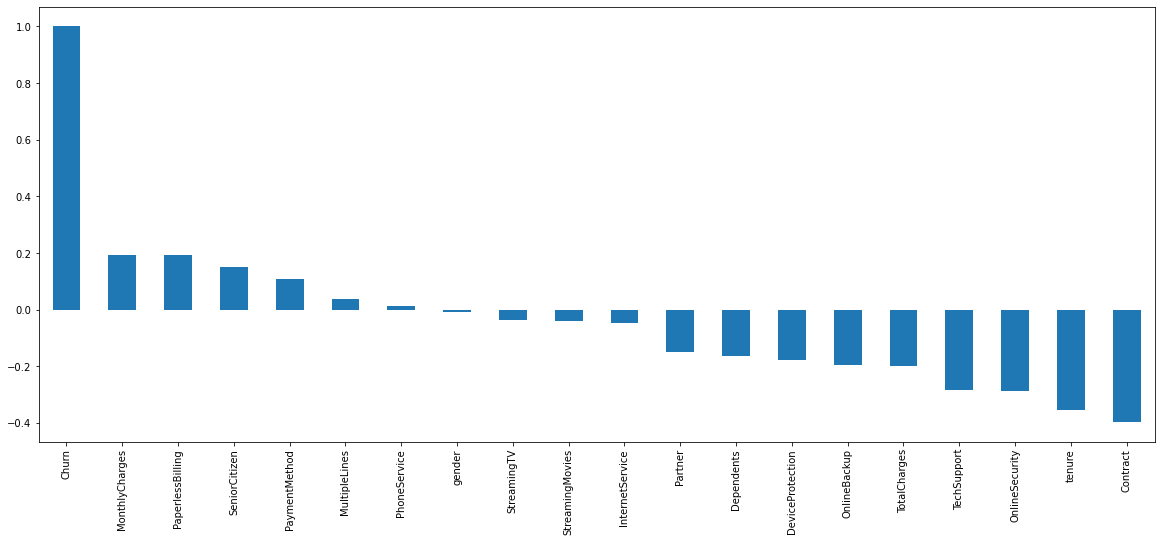

In [31]:
plt.figure(figsize=(20,8))
new_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

<AxesSubplot:>

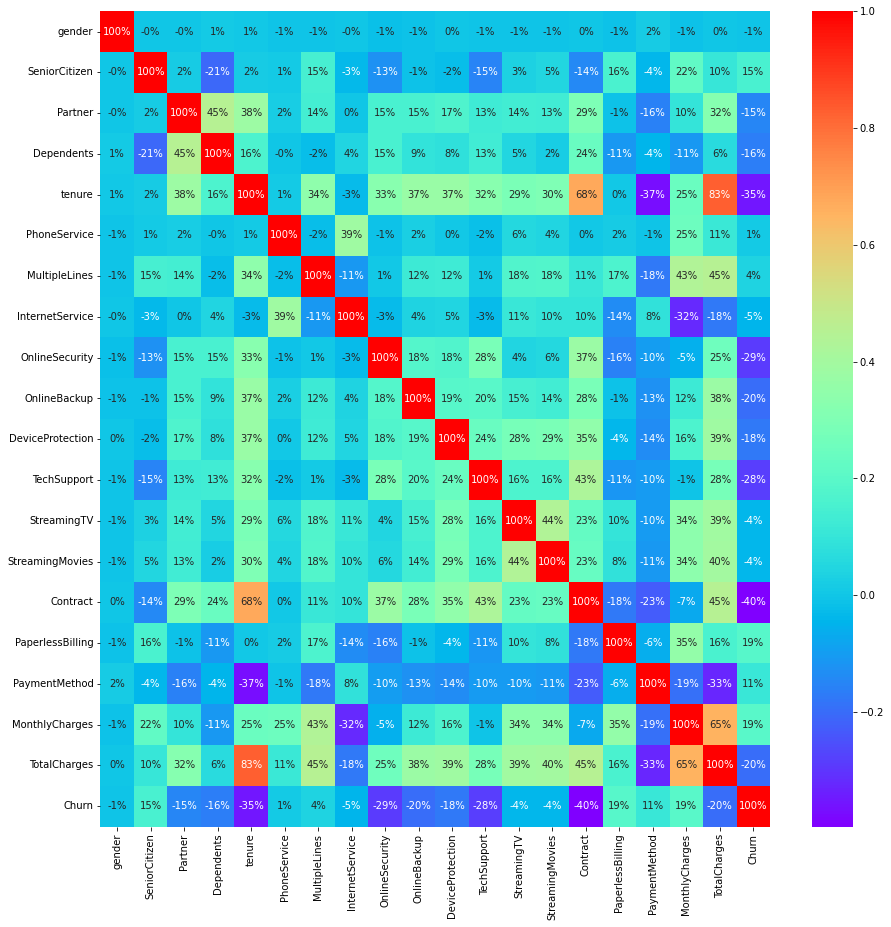

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(new_df.corr(), cmap="rainbow", annot = True, fmt = '.0%')

It is a huge matrix with too many features. So, we will check the correlation only with respect to Churn.

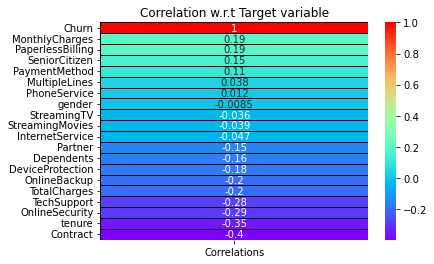

In [33]:
corr = new_df.corrwith(new_df['Churn']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
sns.heatmap(corr,annot = True,cmap = 'rainbow',linewidths = 0.6,linecolor = 'black');
plt.title('Correlation w.r.t Target variable');

DataFrame.corrwith()

Compute pairwise correlation.Pairwise correlation is computed between rows or columns of DataFrame with rows or columns of Series or DataFrame. 

#### Observation from correlation:
* MulipleLines, PhoneService, gender, StreamingTV, StreamingMovies and InternetService does not display any kind of correlation. We drop the features with correlation coefficient between (-0.1,0.1).
* Remaining features either display a significant positive or negative correlation.
* Services such as Online security, Online backup, Tech support and others without internet connection seem to be negatively related to churn.

#### Analyzing the Numerical Variables

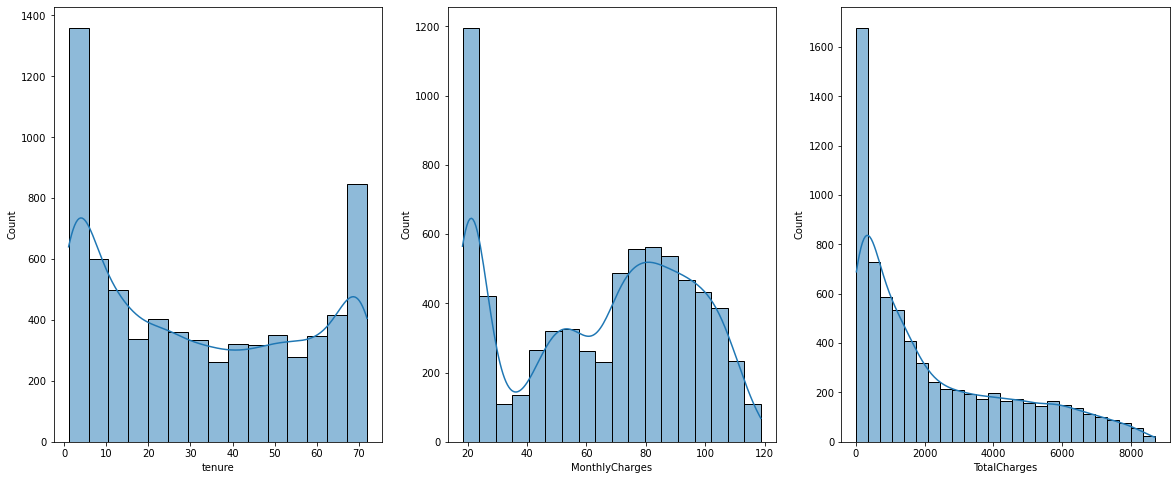

In [34]:
plot , ax = plt.subplots(1 , 3 , figsize = (20 , 8))
g = sns.histplot(new_df['tenure'] , kde = True , ax = ax[0])
g = sns.histplot(new_df['MonthlyCharges'] , kde = True , ax = ax[1])
g = sns.histplot(new_df['TotalCharges'] , kde = True , ax = ax[2])

KDE Plot described as Kernel Density Estimate is used for visualizing the Probability Density of a continuous variable. It depicts the probability density at different values in a continuous variable.

#### Observation:
* The numerical variables are not following a normal distribution. These distributions indicate there are different data distributions present in population data with separate and independent peaks.
* TotalCharges is following Right Skewed distribution

#### Visualizing the numerical variables wrt churn

In [35]:
def kdeplot(feature):
    plt.figure(figsize=(10, 3))
    plt.title("Distribution for {}".format(feature))
    plot1 = sns.kdeplot(new_df[new_df['Churn'] == 0][feature].dropna(), color= 'grey', label= 'Churn: No', shade = True)
    plot2 = sns.kdeplot(new_df[new_df['Churn'] == 1][feature].dropna(), color= 'Red', label= 'Churn: Yes')
    plt.legend(["Not Churn","Churn"],loc='upper right')

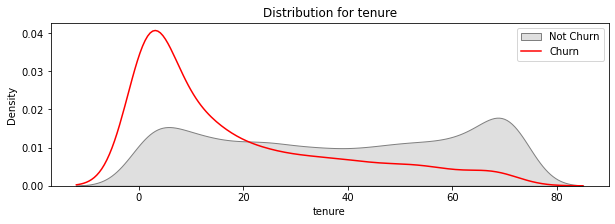

In [36]:
kdeplot('tenure')

#### Observation:
* Churn is higher at lower tenure values
* Recent customers are more likely to churn.

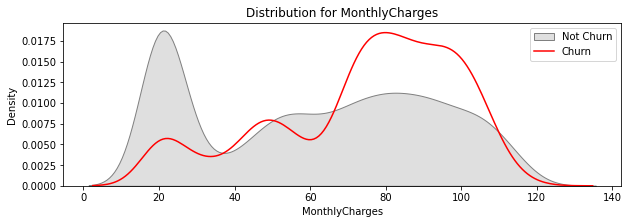

In [37]:
kdeplot('MonthlyCharges')

#### Observation:
* Churn is high when Monthly Charges are high
* Customers with higher MonthlyCharges are more likely to churn.

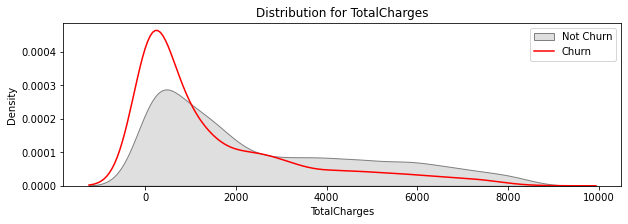

In [38]:
kdeplot('TotalCharges')

#### Observation:
Churn is higher at lower Total Charges

However, all 3 numerical features Monthly Charges, tenure and Total Charges are linked to High Churn.

#### Checking for outliers

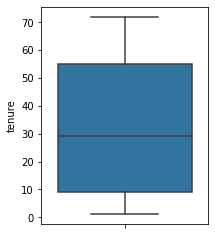

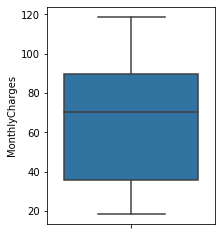

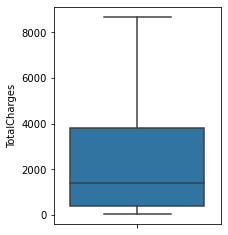

In [39]:
column_name = ['tenure','MonthlyCharges','TotalCharges'] 

def identify_outliers(give_df_name, give_column_name):
    for i in column_name:
        fig = plt.figure(figsize=(3,4))
        sns.boxplot(data = new_df, y = i)
plt.show()

identify_outliers(new_df, column_name)

#### Observation:
There are no values present beyond the upper and lower extremes of the Box plots

#####  Relationship between Monthly Charges and Total Charges

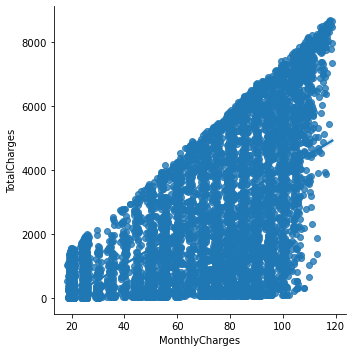

In [40]:
sns.lmplot(x ='MonthlyCharges', y ='TotalCharges', data = new_df)

##### Observation:
Total Charges increase as Monthly Charges increase 

#### Normalization

In [41]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

new_df['tenure'] = mms.fit_transform(new_df[['tenure']])
new_df['MonthlyCharges'] = mms.fit_transform(new_df[['MonthlyCharges']])
new_df['TotalCharges'] = mms.fit_transform(new_df[['TotalCharges']])
new_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,0.000000,0,1,0,0,...,0,0,0,0,0,1,2,0.115423,0.001275,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,0,2,...,2,0,0,0,1,0,3,0.385075,0.215867,0
2,3668-QPYBK,1,0,0,0,0.014085,1,0,0,2,...,0,0,0,0,0,1,3,0.354229,0.010310,1
3,7795-CFOCW,1,0,0,0,0.619718,0,1,0,2,...,2,2,0,0,1,0,0,0.239303,0.210241,0
4,9237-HQITU,0,0,0,0,0.014085,1,0,1,0,...,0,0,0,0,0,1,2,0.521891,0.015330,1


* Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.
Eg : Age = Years; FastingBS = mg / dl; Charges = Currency

* We have 2 options for data scaling : 1) Normalization 2) Standardization. As most of the algorithms assume the data to be normally (Gaussian) distributed, Normalization is done for features whose data does not display normal distribution and standardization is carried out for features that are normally distributed where their values are huge or very small as compared to other features.
* Normalization : tenure, MonthlyCharges and TotalCharges features are normalized
* Standardization : None of the features are standardized for the above data.

In [42]:
new_df.shape

(7032, 21)

In [43]:
x3 = new_df.drop(['Churn','customerID'], axis = 1)
#x = new_df.iloc[:,:19][]

y3 = new_df['Churn']
#y = new_df.iloc[:,-1]

In [44]:
x3.shape, y3.shape

((7032, 19), (7032,))

In [45]:
new_df.shape

(7032, 21)

#### 4. Model Building

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
import scikitplot as skplot

In [47]:
!pip install scikit-plot

#### Data Balancing using SMOTE :
In order to cope with imbalanced data, there are 2 options :
* Undersampling : Trim down the majority samples of the target variable.
* Oversampling : Increase the minority samples of the target variable to the majority samples.
* we have decided to go with oversampling beacuse we might lose data if we do undersampling
* For data balancing, we will use imblearn.
* pip statement : !pip install imbalanced-learn

In [48]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

In [49]:
from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,train_size=0.8)

In [50]:
#smote
from imblearn.over_sampling import SMOTE
os = SMOTE()
print('Classes and number of values in trainset before SMOTE:',Counter(y3_train),'\n')
x3_res,y3_res = os.fit_resample(x3_train,y3_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y3_res),'\n')

Classes and number of values in trainset before SMOTE: Counter({0: 4120, 1: 1505}) 

Classes and number of values in trainset after SMOTE: Counter({1: 4120, 0: 4120}) 



##### After applying smote, now we start building the models

#### 1. LOGISTIC REGRESSION

In [51]:
print(y3_res.value_counts())
print(y3_train.value_counts())
print(y3_test.value_counts())

1    4120
0    4120
Name: Churn, dtype: int64
0    4120
1    1505
Name: Churn, dtype: int64
0    1043
1     364
Name: Churn, dtype: int64


Logistic Regression Accuracy  :  0.7979368932038835
Logistic Regression Cross Validation Score :  86.77%
ROC_AUC Score :  79.66%
Text(0.5, 1.0, 'ROC_AUC_Plot')


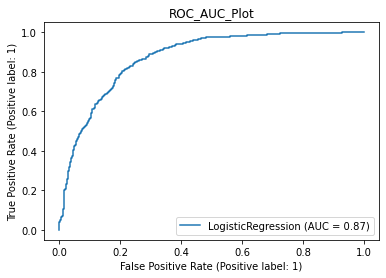

None
MODEL EVALUATION
Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.83      0.74      0.78       806
           1       0.77      0.86      0.81       842

    accuracy                           0.80      1648
   macro avg       0.80      0.80      0.80      1648
weighted avg       0.80      0.80      0.80      1648

Logistic Regression f1 score : 81.24%
Logistic Regression Precision score : 77.28%
Logistic Regression recall score : 85.63%


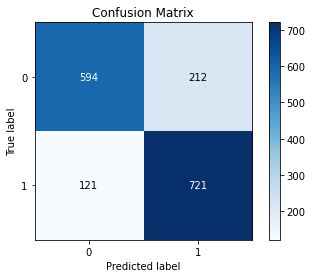

In [52]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state = 1000)

from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3_res,y3_res,train_size=0.8)

classifier_lr.fit(x3_train,y3_train)
y3_pred = classifier_lr.predict(x3_test)
    
accuracy_lr = accuracy_score(y3_test, y3_pred)
print('Logistic Regression Accuracy  : ',accuracy_lr)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
cv_score_lr = cross_val_score(classifier_lr,x3_train,y3_train,cv = cv,scoring = 'roc_auc').mean()
print("Logistic Regression Cross Validation Score : ",'{0:.2%}'.format(cv_score_lr))
    
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y3_test,y3_pred)))
print(plot_roc_curve(classifier_lr, x3_test,y3_test))
print(plt.title('ROC_AUC_Plot'))
print(plt.show())
            
print("MODEL EVALUATION")
        
print("Logistic Regression Classification Report")
print(classification_report(y3_test,classifier_lr.predict(x3_test)))

# f1_score
f1_score_lr = f1_score(y3_test, y3_pred)
print('Logistic Regression f1 score :','{0:.2%}'.format(f1_score_lr))
            
# precision
precision_score_lr = precision_score(y3_test, y3_pred)
print('Logistic Regression Precision score :','{0:.2%}'.format(precision_score_lr))
            
# precision
recall_score_lr = recall_score(y3_test, y3_pred)
print('Logistic Regression recall score :','{0:.2%}'.format(recall_score_lr))
            
# Confusion Matrix
skplot.metrics.plot_confusion_matrix(y3_test,y3_pred)
plt.show()

#### 2. DECISION TREE CLASSIFIER

Decision Tree Classifier Accuracy  :  0.779126213592233
Decision Tree Classifier Cross Validation Score :  84.68%
ROC_AUC Score :  77.81%
Text(0.5, 1.0, 'ROC_AUC_Plot')


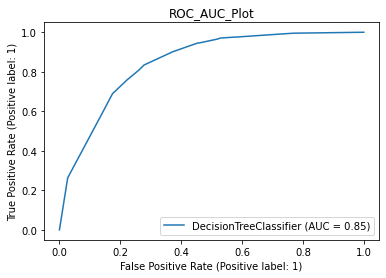

None
MODEL EVALUATION
Decision Tree Classifier Classification Report
              precision    recall  f1-score   support

           0       0.81      0.72      0.76       809
           1       0.76      0.83      0.79       839

    accuracy                           0.78      1648
   macro avg       0.78      0.78      0.78      1648
weighted avg       0.78      0.78      0.78      1648

Decision Tree Classifier f1 score : 79.37%
Decision Tree Classifier Precision score : 75.68%
Decision Tree Classifier recall score : 83.43%


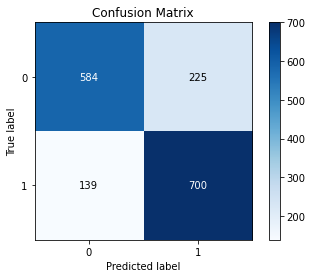

In [53]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3_res,y3_res,train_size=0.8)

classifier_dtc.fit(x3_train,y3_train)
y3_pred = classifier_dtc.predict(x3_test)
    
accuracy_dtc = accuracy_score(y3_test, y3_pred)
print('Decision Tree Classifier Accuracy  : ',accuracy_dtc)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
cv_score_dtc = cross_val_score(classifier_dtc,x3_train,y3_train,cv = cv,scoring = 'roc_auc').mean()
print("Decision Tree Classifier Cross Validation Score : ",'{0:.2%}'.format(cv_score_dtc))
    
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y3_test,y3_pred)))
print(plot_roc_curve(classifier_dtc, x3_test,y3_test))
print(plt.title('ROC_AUC_Plot'))
print(plt.show())
            
print("MODEL EVALUATION")
        
print("Decision Tree Classifier Classification Report")
print(classification_report(y3_test,classifier_dtc.predict(x3_test)))

# f1_score
f1_score_dtc = f1_score(y3_test, y3_pred)
print('Decision Tree Classifier f1 score :','{0:.2%}'.format(f1_score_dtc))
            
# precision
precision_score_dtc = precision_score(y3_test, y3_pred)
print('Decision Tree Classifier Precision score :','{0:.2%}'.format(precision_score_dtc))
            
# precision
recall_score_dtc = recall_score(y3_test, y3_pred)
print('Decision Tree Classifier recall score :','{0:.2%}'.format(recall_score_dtc))
            
# Confusion Matrix
skplot.metrics.plot_confusion_matrix(y3_test,y3_pred)
plt.show()

#### 3. RANDOM FOREST CLASSIFIER

Random Forest Classifier Accuracy  :  0.787621359223301
Random Forest Classifier Cross Validation Score :  86.15%
ROC_AUC Score :  78.99%
Text(0.5, 1.0, 'ROC_AUC_Plot')


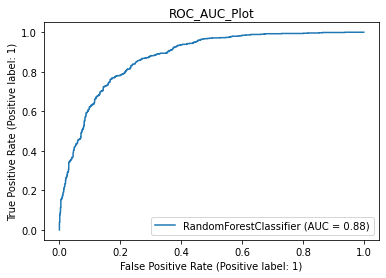

None
MODEL EVALUATION
Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       0.85      0.71      0.77       847
           1       0.74      0.87      0.80       801

    accuracy                           0.79      1648
   macro avg       0.80      0.79      0.79      1648
weighted avg       0.80      0.79      0.79      1648

Random Forest Classifier f1 score : 79.37%
Random Forest Classifier Precision score : 73.81%
Random Forest Classifier recall score : 87.27%


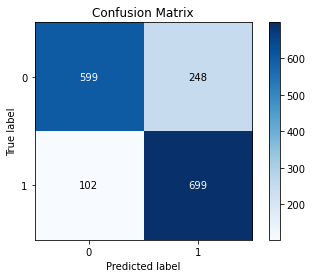

In [54]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3_res,y3_res,train_size=0.8)

classifier_rf.fit(x3_train,y3_train)
y3_pred = classifier_rf.predict(x3_test)
    
accuracy_rf = accuracy_score(y3_test, y3_pred)
print('Random Forest Classifier Accuracy  : ',accuracy_rf)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
cv_score_rf = cross_val_score(classifier_rf,x3_train,y3_train,cv = cv,scoring = 'roc_auc').mean()
print("Random Forest Classifier Cross Validation Score : ",'{0:.2%}'.format(cv_score_rf))
    
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y3_test,y3_pred)))
print(plot_roc_curve(classifier_rf, x3_test,y3_test))
print(plt.title('ROC_AUC_Plot'))
print(plt.show())
            
print("MODEL EVALUATION")
        
print("Random Forest Classifier Classification Report")
print(classification_report(y3_test,classifier_rf.predict(x3_test)))

# f1_score
f1_score_rf = f1_score(y3_test, classifier_rf.predict(x3_test))
print('Random Forest Classifier f1 score :','{0:.2%}'.format(f1_score_dtc))
            
# precision
precision_score_rf = precision_score(y3_test, classifier_rf.predict(x3_test))
print('Random Forest Classifier Precision score :','{0:.2%}'.format(precision_score_rf))
            
# precision
recall_score_rf = recall_score(y3_test, y3_pred)
print('Random Forest Classifier recall score :','{0:.2%}'.format(recall_score_rf))
            
# Confusion Matrix
skplot.metrics.plot_confusion_matrix(y3_test,y3_pred)
plt.show()

#### K NEAREST NEIGHBORS

KNN Accuracy  :  0.7961165048543689
KNN Cross Validation Score :  85.72%
ROC_AUC Score :  80.00%
Text(0.5, 1.0, 'ROC_AUC_Plot')


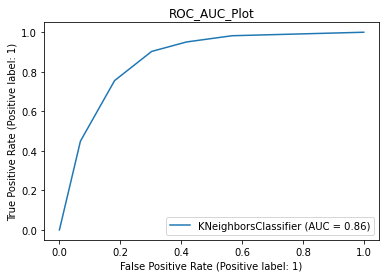

None
MODEL EVALUATION
KNN Classification Report
              precision    recall  f1-score   support

           0       0.89      0.70      0.78       855
           1       0.73      0.90      0.81       793

    accuracy                           0.80      1648
   macro avg       0.81      0.80      0.80      1648
weighted avg       0.81      0.80      0.79      1648

KNN f1 score : 81.00%
KNN Precision score : 73.44%
KNN recall score : 90.29%


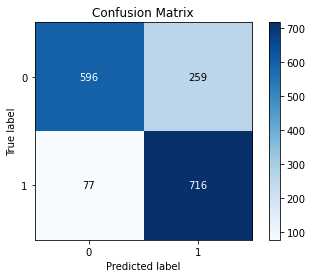

In [55]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
classifier_knn= KNeighborsClassifier()

from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3_res,y3_res,train_size=0.8)

classifier_knn.fit(x3_train,y3_train)
y3_pred = classifier_knn.predict(x3_test)
    
accuracy_knn = accuracy_score(y3_test, y3_pred)
print('KNN Accuracy  : ',accuracy_knn)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
cv_score_knn = cross_val_score(classifier_knn,x3_train,y3_train,cv = cv,scoring = 'roc_auc').mean()
print("KNN Cross Validation Score : ",'{0:.2%}'.format(cv_score_knn))
    
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y3_test,y3_pred)))
print(plot_roc_curve(classifier_knn, x3_test,y3_test))
print(plt.title('ROC_AUC_Plot'))
print(plt.show())
            
print("MODEL EVALUATION")
        
print("KNN Classification Report")
print(classification_report(y3_test,classifier_knn.predict(x3_test)))

# f1_score
f1_score_knn = f1_score(y3_test, classifier_knn.predict(x3_test))
print('KNN f1 score :','{0:.2%}'.format(f1_score_knn))
            
# precision
precision_score_knn = precision_score(y3_test, classifier_knn.predict(x3_test))
print('KNN Precision score :','{0:.2%}'.format(precision_score_knn))
            
# precision
recall_score_knn = recall_score(y3_test, y3_pred)
print('KNN recall score :','{0:.2%}'.format(recall_score_knn))
            
# Confusion Matrix
skplot.metrics.plot_confusion_matrix(y3_test,y3_pred)
plt.show()

#### 5. SUPPORT VECTOR CLASSIFIER

Support Vector Classifier Accuracy  :  0.7967233009708737
Support Vector Classifier Cross Validation Score :  87.47%
ROC_AUC Score :  79.60%
Text(0.5, 1.0, 'ROC_AUC_Plot')


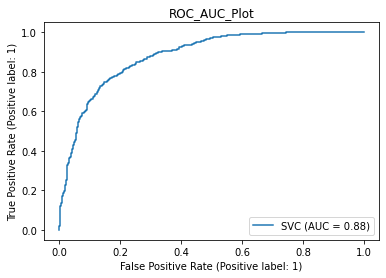

None
MODEL EVALUATION
Support vector Classifier Classification Report
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       810
           1       0.78      0.84      0.81       838

    accuracy                           0.80      1648
   macro avg       0.80      0.80      0.80      1648
weighted avg       0.80      0.80      0.80      1648

Support vector Classifier f1 score : 80.80%
Support vector Classifier Precision score : 77.73%
Support vector Classifier recall score : 84.13%


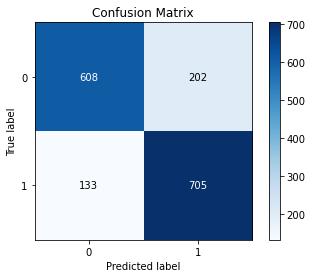

In [56]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.svm import SVC
classifier_svc = SVC()

from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3_res,y3_res,train_size=0.8)

classifier_svc.fit(x3_train,y3_train)
y3_pred = classifier_svc.predict(x3_test)
    
accuracy_svc = accuracy_score(y3_test, y3_pred)
print('Support Vector Classifier Accuracy  : ',accuracy_svc)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
cv_score_svc = cross_val_score(classifier_svc,x3_train,y3_train,cv = cv,scoring = 'roc_auc').mean()
print("Support Vector Classifier Cross Validation Score : ",'{0:.2%}'.format(cv_score_svc))
    
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y3_test,y3_pred)))
print(plot_roc_curve(classifier_svc, x3_test,y3_test))
print(plt.title('ROC_AUC_Plot'))
print(plt.show())
            
print("MODEL EVALUATION")
        
print("Support vector Classifier Classification Report")
print(classification_report(y3_test,classifier_svc.predict(x3_test)))

# f1_score
f1_score_svc = f1_score(y3_test, classifier_svc.predict(x3_test))
print('Support vector Classifier f1 score :','{0:.2%}'.format(f1_score_svc))
            
# precision
precision_score_svc = precision_score(y3_test, classifier_svc.predict(x3_test))
print('Support vector Classifier Precision score :','{0:.2%}'.format(precision_score_svc))
            
# precision
recall_score_svc = recall_score(y3_test, y3_pred)
print('Support vector Classifier recall score :','{0:.2%}'.format(recall_score_svc))
            
# Confusion Matrix
skplot.metrics.plot_confusion_matrix(y3_test,y3_pred)
plt.show()

#### 6. ADABOOST CLASSIFIER

AdaBoostClassifier Accuracy  :  0.7870145631067961
AdaBoostClassifier Cross Validation Score :  87.57%
ROC_AUC Score :  78.68%
Text(0.5, 1.0, 'ROC_AUC_Plot')


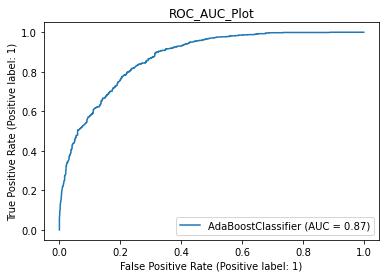

None
MODEL EVALUATION
AdaBoostClassifier Classification Report
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       820
           1       0.76      0.84      0.80       828

    accuracy                           0.79      1648
   macro avg       0.79      0.79      0.79      1648
weighted avg       0.79      0.79      0.79      1648

AdaBoostClassifier f1 score : 79.84%
AdaBoostClassifier Precision score : 76.12%
AdaBoostClassifier recall score : 83.94%


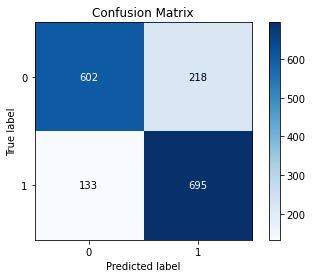

In [57]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.ensemble import AdaBoostClassifier
classifier_ada = AdaBoostClassifier()

from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3_res,y3_res,train_size=0.8)

classifier_ada.fit(x3_train,y3_train)
y3_pred = classifier_ada.predict(x3_test)
    
accuracy_ada = accuracy_score(y3_test, y3_pred)
print('AdaBoostClassifier Accuracy  : ',accuracy_ada)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
cv_score_ada = cross_val_score(classifier_ada,x3_train,y3_train,cv = cv,scoring = 'roc_auc').mean()
print("AdaBoostClassifier Cross Validation Score : ",'{0:.2%}'.format(cv_score_ada))
    
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y3_test,y3_pred)))
print(plot_roc_curve(classifier_ada, x3_test,y3_test))
print(plt.title('ROC_AUC_Plot'))
print(plt.show())
            
print("MODEL EVALUATION")
        
print("AdaBoostClassifier Classification Report")
print(classification_report(y3_test,classifier_ada.predict(x3_test)))

# f1_score
f1_score_ada = f1_score(y3_test, classifier_ada.predict(x3_test))
print('AdaBoostClassifier f1 score :','{0:.2%}'.format(f1_score_ada))
            
# precision
precision_score_ada = precision_score(y3_test, classifier_ada.predict(x3_test))
print('AdaBoostClassifier Precision score :','{0:.2%}'.format(precision_score_ada))
            
# precision
recall_score_ada = recall_score(y3_test, y3_pred)
print('AdaBoostClassifier recall score :','{0:.2%}'.format(recall_score_ada))
            
# Confusion Matrix
skplot.metrics.plot_confusion_matrix(y3_test,y3_pred)
plt.show()

#### 7. XGBOOST CLASSIFIER

XGBClassifier Accuracy  :  0.8452669902912622
XGBClassifier Cross Validation Score :  90.94%
ROC_AUC Score :  84.42%
Text(0.5, 1.0, 'ROC_AUC_Plot')


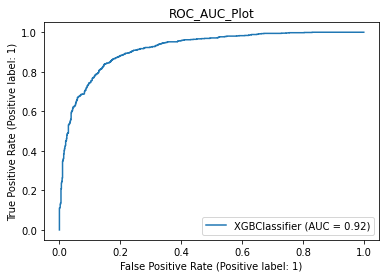

None
MODEL EVALUATION
XGBClassifier Classification Report
              precision    recall  f1-score   support

           0       0.84      0.82      0.83       780
           1       0.85      0.86      0.85       868

    accuracy                           0.85      1648
   macro avg       0.85      0.84      0.84      1648
weighted avg       0.85      0.85      0.85      1648

XGBClassifier f1 score : 85.47%
XGBClassifier Precision score : 84.55%
XGBClassifier recall score : 86.41%


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

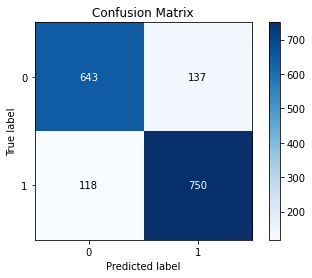

In [58]:
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBClassifier
classifier_xgb = XGBClassifier(learning_rate= 0.01,max_depth = 10,n_estimators = 1000)

from sklearn.model_selection import train_test_split
x3_train,x3_test,y3_train,y3_test=train_test_split(x3_res,y3_res,train_size=0.8)

classifier_xgb.fit(x3_train,y3_train)
y3_pred = classifier_xgb.predict(x3_test)
    
accuracy_xgb = accuracy_score(y3_test, y3_pred)
print('XGBClassifier Accuracy  : ',accuracy_xgb)

cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
cv_score_xgb = cross_val_score(classifier_xgb,x3_train,y3_train,cv = cv,scoring = 'roc_auc').mean()
print("XGBClassifier Cross Validation Score : ",'{0:.2%}'.format(cv_score_xgb))
    
print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y3_test,y3_pred)))
print(plot_roc_curve(classifier_xgb, x3_test,y3_test))
print(plt.title('ROC_AUC_Plot'))
print(plt.show())
            
print("MODEL EVALUATION")
        
print("XGBClassifier Classification Report")
print(classification_report(y3_test,classifier_xgb.predict(x3_test)))

# f1_score
f1_score_xgb = f1_score(y3_test, classifier_xgb.predict(x3_test))
print('XGBClassifier f1 score :','{0:.2%}'.format(f1_score_xgb))
            
# precision
precision_score_xgb = precision_score(y3_test, classifier_xgb.predict(x3_test))
print('XGBClassifier Precision score :','{0:.2%}'.format(precision_score_xgb))
            
# precision
recall_score_xgb = recall_score(y3_test, y3_pred)
print('XGBClassifier recall score :','{0:.2%}'.format(recall_score_xgb))
            
# Confusion Matrix
skplot.metrics.plot_confusion_matrix(y3_test,y3_pred)

#### MAKING A DATAFRAME OF ALL THE SCORES FOR EVERY MODEL BUILT

In [59]:
#Making a dataframe of all the scores for every model
scores = [("Logistic Regression", accuracy_lr,cv_score_lr, f1_score_lr,precision_score_lr,recall_score_lr),
           ("Decision Tree",accuracy_dtc,cv_score_dtc, f1_score_dtc,precision_score_dtc,recall_score_dtc),
           ("Random Forest", accuracy_rf,cv_score_rf, f1_score_rf,precision_score_rf,recall_score_rf),
           ("KNN", accuracy_knn,cv_score_knn, f1_score_knn,precision_score_knn,recall_score_knn),
           ('Support vector machine',accuracy_svc,cv_score_svc, f1_score_svc,precision_score_svc,recall_score_svc),
           ('AdaBoost Classifier',accuracy_ada,cv_score_ada, f1_score_ada,precision_score_ada,recall_score_ada),
           ('XGBoost Classfier',accuracy_xgb,cv_score_xgb, f1_score_xgb,precision_score_xgb,recall_score_xgb)]

Scores =pd.DataFrame(data = scores, columns=['Model Name','Test Accuracy','Mean Cross validation score', 'F1 Score', 'Precision', 'Recall'])
Scores.set_index('Model Name', inplace = True)

In [60]:
Scores.style.background_gradient(cmap='YlGn')

,Test Accuracy,Mean Cross validation score,F1 Score,Precision,Recall
Model Name,,,,,
Logistic Regression,0.797937,0.867655,0.812394,0.772776,0.856295
Decision Tree,0.779126,0.846839,0.793651,0.756757,0.834327
Random Forest,0.787621,0.861525,0.799771,0.738120,0.872659
KNN,0.796117,0.857162,0.809955,0.734359,0.902900
Support vector machine,0.796723,0.874712,0.808023,0.777288,0.841289
AdaBoost Classifier,0.787015,0.875674,0.798392,0.761227,0.839372
XGBoost Classfier,0.845267,0.909399,0.854701,0.845547,0.864055


We see that 'XGBoost classifier' gives 83.8% accuracy followed by KNN and Support vector machine which gives 80% accuracy

## CONCLUSION wrt Customer Information
1. Customer churning for SeniorCitizen customers is pretty low.
2. Cutomers without a partner or dependent are more likely to churn.

## CONCLUSION wrt Services Subscribed by the Customer
1. For PhoneService, despite having no phone service, more customers were retained as compared to the number of customers who dropped the services.
2. Customers have mostly dropped services when there was no TECHSUPPORT, Device Protection, online backup and online security.
3. A high number of customers have displayed their resistance towards the use of Fiber optic cables for providing the InternetService. On the contrary, from the above graph, customers prefer using DSL for their InternetService!

## CONCLUSION wrt Payment Information
1. Customers with contract of one year and more are less likelyy to churn.Customer churning for a Month-to-Month based Contract is quite high.
2. PaperlessBilling displays a high number of customers being churned out.
3. Customers clearly resented the Electronic check PaymentMethod. Company definitely needs to either drop Electronic check method or make it hassle-free and user-friendly.